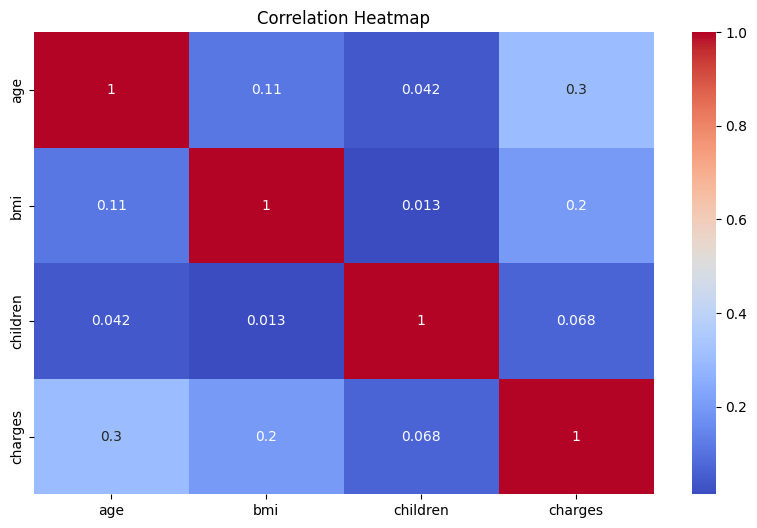

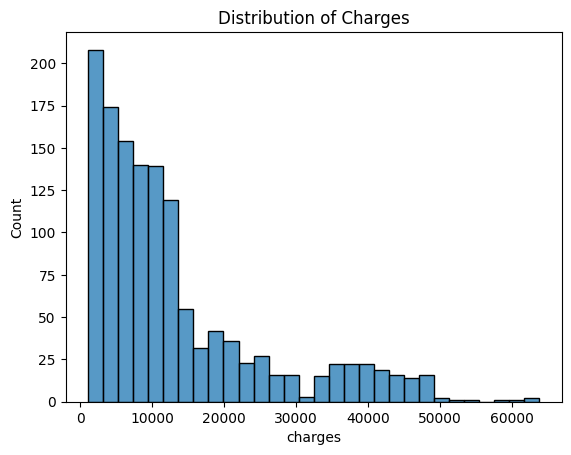

Linear MSE: 34513720.34667861
Random Forest MSE: 25713114.24967444


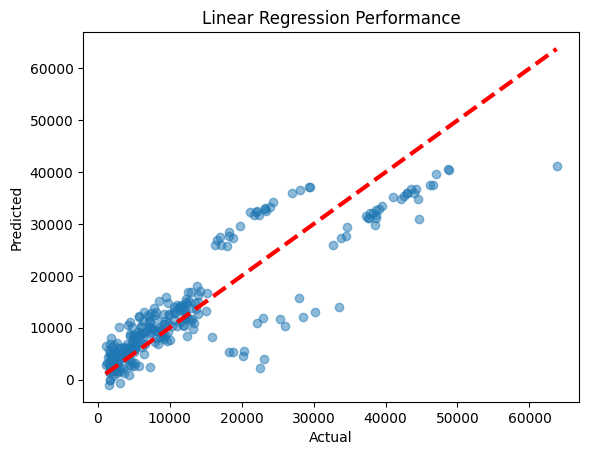

DONE! Refresh the files tab on the left and download the .pkl files.


In [1]:
# --- STEP 1: Libraries ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# --- STEP 2: Load & Visualize ---
df = pd.read_csv('insurance.csv')

# 1. Correlation Heatmap (Rubric Requirement)
plt.figure(figsize=(10,6))
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 2. Distribution Plot
sns.histplot(df['charges'])
plt.title("Distribution of Charges")
plt.show()

# --- STEP 3: Preprocessing ---
# Convert 'smoker' to numbers (yes=1, no=0)
le = LabelEncoder()
df['smoker'] = le.fit_transform(df['smoker'])

# We will use Age, BMI, and Smoker to predict Charges
X = df[['age', 'bmi', 'smoker']]
y = df['charges']

# Standardize the data (Rubric Requirement)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- STEP 4: Train Models ---
# A. Linear Regression (Gradient Descent)
lr_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
lr_model.fit(X_train, y_train)

# B. Random Forest (Likely the winner)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# C. Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Check errors
print(f"Linear MSE: {mean_squared_error(y_test, lr_model.predict(X_test))}")
print(f"Random Forest MSE: {mean_squared_error(y_test, rf_model.predict(X_test))}")

# --- STEP 5: Final Plots & Save ---
# Scatter Plot with Line (Rubric Requirement)
preds = lr_model.predict(X_test)
plt.scatter(y_test, preds, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=3) # The "Perfect Fit" line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression Performance")
plt.show()

# Save the best model (RF) and the Scaler
joblib.dump(rf_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("DONE! Refresh the files tab on the left and download the .pkl files.")